In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create a data frame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Text(0.5, 1.0, 'Scatter Plot')

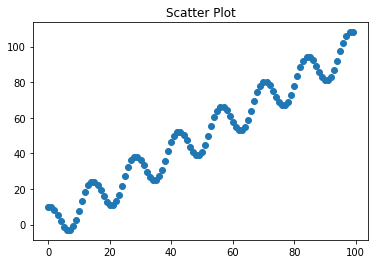

In [4]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

In [11]:
learning_progress=learning_progress.sort_values(by=['knowledge'])
learning_progress['cdiff']= learning_progress.confidence.diff()
learning_progress['cdiffdiff']=learning_progress.cdiff.diff()
learning_progress

,date,knowledge,confidence,cdiff,cdiffdiff
0,2017-01-01,0,10.000000,NaN,NaN
1,2017-01-02,1,10.009689,0.009689,NaN
2,2017-01-03,2,8.234898,-1.774791,-1.784479
3,2017-01-04,3,5.225209,-3.009689,-1.234898
4,2017-01-05,4,1.774791,-3.450419,-0.440730
...,...,...,...,...,...
95,2017-04-06,95,97.225209,5.450419,0.440730
96,2017-04-07,96,102.234898,5.009689,-0.440730
97,2017-04-08,97,106.009689,3.774791,-1.234898
98,2017-04-09,98,108.000000,1.990311,-1.784479


In [13]:
learning_progress.head(10)

,date,knowledge,confidence,cdiff,cdiffdiff
0,2017-01-01,0,10.000000,NaN,NaN
1,2017-01-02,1,10.009689,0.009689,NaN
2,2017-01-03,2,8.234898,-1.774791,-1.784479
3,2017-01-04,3,5.225209,-3.009689,-1.234898
4,2017-01-05,4,1.774791,-3.450419,-0.440730
5,2017-01-06,5,-1.234898,-3.009689,0.440730
6,2017-01-07,6,-3.009689,-1.774791,1.234898
7,2017-01-08,7,-3.000000,0.009689,1.784479
8,2017-01-09,8,-1.009689,1.990311,1.980623
9,2017-01-10,9,2.765102,3.774791,1.784479


In [15]:
periods=learning_progress[(learning_progress['cdiff'].abs()<.02)& (learning_progress['cdiffdiff']>1)].knowledge.diff()
periods

7      NaN
21    14.0
35    14.0
49    14.0
63    14.0
77    14.0
91    14.0
Name: knowledge, dtype: float64